Task 2:
Role: Part of a retail analytics team and is approached by the Category Manager for Chips. Asked to test the impact of new trial layouts to determine whether the layout should be rolled out to all stores.
Timeline: Trial Period is February 2019 - April 2019
1. Select Control Stores: Explore the data and define metrics for control store
- Think about what makes them a control store
- Look at the drivers and visualize these graphs
- Create a function
2. Assessments of the trial: Give insight for the store (Trial Stores are 77, 86, 88)
- Check each store in comparison with control store to get overall performence
- Define metrics to see if it is sucessful
3. Summarize findings
- Summarize findings for each store and provide a recommendation that outling the impact on sales during trial period
- Visualization are very important and save tem.

Pearson Correlations
- Each case are independent from each other
- Must be a linear relationship between variables (straight line), can be verified using scatterplot (rectangle shape)

Degrees of Correlation (Relationship between 2 quant variables)
- Perfect: Value near +- 1, meaning increasing one variable increase/decrease the other
- High Degree: Values between 0.5 to 1 suggests strong correlation
- Moderate Degree: Values between 0.3 and 0.49
- Low Degree: Values between 0.29
- No Correlation: Value = 0



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Dataset/QVI_data.csv")
df

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream
...,...,...,...,...,...,...,...,...,...,...,...,...
264829,2370701,2018-12-08,88,240378,24,Grain Waves Sweet Chilli 210g,2,7.2,210,GRNWVES,YOUNG FAMILIES,Mainstream
264830,2370751,2018-10-01,88,240394,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,150,KETTLE,YOUNG FAMILIES,Premium
264831,2370961,2018-10-24,88,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,165,TYRRELLS,OLDER FAMILIES,Budget
264832,2370961,2018-10-27,88,240481,65,Old El Paso Salsa Dip Chnky Tom Ht300g,2,10.2,300,OLD,OLDER FAMILIES,Budget


In [4]:
df["DATE"] = pd.to_datetime(df["DATE"])
df["YEAR_MONTH"] = df["DATE"].dt.strftime("%Y-%m")
df

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,YEAR_MONTH
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium,2018-10
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream,2018-09
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget,2019-03
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget,2019-03
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream,2018-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
264829,2370701,2018-12-08,88,240378,24,Grain Waves Sweet Chilli 210g,2,7.2,210,GRNWVES,YOUNG FAMILIES,Mainstream,2018-12
264830,2370751,2018-10-01,88,240394,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,150,KETTLE,YOUNG FAMILIES,Premium,2018-10
264831,2370961,2018-10-24,88,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,165,TYRRELLS,OLDER FAMILIES,Budget,2018-10
264832,2370961,2018-10-27,88,240481,65,Old El Paso Salsa Dip Chnky Tom Ht300g,2,10.2,300,OLD,OLDER FAMILIES,Budget,2018-10


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   LYLTY_CARD_NBR    264834 non-null  int64         
 1   DATE              264834 non-null  datetime64[ns]
 2   STORE_NBR         264834 non-null  int64         
 3   TXN_ID            264834 non-null  int64         
 4   PROD_NBR          264834 non-null  int64         
 5   PROD_NAME         264834 non-null  object        
 6   PROD_QTY          264834 non-null  int64         
 7   TOT_SALES         264834 non-null  float64       
 8   PACK_SIZE         264834 non-null  int64         
 9   BRAND             264834 non-null  object        
 10  LIFESTAGE         264834 non-null  object        
 11  PREMIUM_CUSTOMER  264834 non-null  object        
 12  YEAR_MONTH        264834 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(6), object(5)
memor

Monthly Sales Experience: (Group by Store, then year-month)
- Only consider stores that have sales every month over July 2018 and June 2019. Select the best control store for each trial store during its pre-trial period.
1. Total Sales Revenue
2. Total Number of Customers
3. Average number of transactions per customer


Total Sales Revenue

In [6]:
df_have_sales = df.copy()
df_have_sales = df_have_sales[df_have_sales["DATE"].between("2018-07-01", "2019-06-30")]
print(f'Min: {df_have_sales["DATE"].min()}')
print(f'Max: {df_have_sales["DATE"].max()}')

Min: 2018-07-01 00:00:00
Max: 2019-06-30 00:00:00


In [7]:
valid_stores = []
df_have_sales_grouped = df_have_sales.groupby("STORE_NBR")
store_count = df_have_sales_grouped["YEAR_MONTH"].nunique()
for store_nbr, count in store_count.items():
    if count == 12:
        valid_stores.append(store_nbr)
print(len(valid_stores))

260


In [8]:
# Ready to use for all metric calculation
df_have_sales_filtered = df_have_sales[df_have_sales["STORE_NBR"].isin(valid_stores)]
df_have_sales_filtered["STORE_NBR"].nunique()

260

In [9]:
df_potential_trial = df_have_sales_filtered[df_have_sales_filtered["YEAR_MONTH"] < "2019-02"]
print(f'Max: {df_potential_trial["YEAR_MONTH"].max()}')

Max: 2019-01


In [10]:
tot_sales_per_store = df_potential_trial.groupby(["STORE_NBR", "YEAR_MONTH"])["TOT_SALES"].sum()
tot_sales_per_store

STORE_NBR  YEAR_MONTH
1          2018-07       206.9
           2018-08       176.1
           2018-09       278.8
           2018-10       188.1
           2018-11       192.6
                         ...  
272        2018-09       304.7
           2018-10       430.6
           2018-11       376.2
           2018-12       403.9
           2019-01       423.0
Name: TOT_SALES, Length: 1820, dtype: float64

In [11]:
unique_customers_per_store = df_potential_trial.groupby(["STORE_NBR", "YEAR_MONTH"])["LYLTY_CARD_NBR"].nunique()
unique_customers_per_store

STORE_NBR  YEAR_MONTH
1          2018-07       49
           2018-08       42
           2018-09       59
           2018-10       44
           2018-11       46
                         ..
272        2018-09       32
           2018-10       44
           2018-11       41
           2018-12       47
           2019-01       46
Name: LYLTY_CARD_NBR, Length: 1820, dtype: int64

In [12]:
total_transactions_per_store = df_potential_trial.groupby(["STORE_NBR", "YEAR_MONTH"])["TXN_ID"].count()
total_transactions_per_store

STORE_NBR  YEAR_MONTH
1          2018-07       52
           2018-08       43
           2018-09       62
           2018-10       45
           2018-11       47
                         ..
272        2018-09       36
           2018-10       51
           2018-11       45
           2018-12       47
           2019-01       50
Name: TXN_ID, Length: 1820, dtype: int64

In [13]:
average_trans_per_store = round(total_transactions_per_store/unique_customers_per_store,2)
average_trans_per_store

STORE_NBR  YEAR_MONTH
1          2018-07       1.06
           2018-08       1.02
           2018-09       1.05
           2018-10       1.02
           2018-11       1.02
                         ... 
272        2018-09       1.12
           2018-10       1.16
           2018-11       1.10
           2018-12       1.00
           2019-01       1.09
Length: 1820, dtype: float64

In [14]:
metrics_df = pd.DataFrame({
    'TOT_SALES': tot_sales_per_store,
    'UNIQUE_CUSTOMERS': unique_customers_per_store,
    'TOTAL_TXNS': total_transactions_per_store,
    'AVG_TXNS_PER_CUST': average_trans_per_store
})
metrics_df

TOT_SALES  UNIQUE_CUSTOMERS  TOTAL_TXNS  \
STORE_NBR YEAR_MONTH                                            
1         2018-07         206.9                49          52   
          2018-08         176.1                42          43   
          2018-09         278.8                59          62   
          2018-10         188.1                44          45   
          2018-11         192.6                46          47   
...                         ...               ...         ...   
272       2018-09         304.7                32          36   
          2018-10         430.6                44          51   
          2018-11         376.2                41          45   
          2018-12         403.9                47          47   
          2019-01         423.0                46          50   

                      AVG_TXNS_PER_CUST  
STORE_NBR YEAR_MONTH                     
1         2018-07                  1.06  
          2018-08                  1.02  
          2018-09                  1.05  
          2018-10                  1.02  
          2018-11                  1.02  
...                                 ...  
272       2018-09                  1.12  
          2018-10                  1.16  
          2018-11                  1.10  
          2018-12                  1.00  
          2019-01                  1.09  

[1820 rows x 4 columns]

In [15]:
store_list = metrics_df.index.get_level_values('STORE_NBR').unique()
store_list

Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
       ...
       263, 264, 265, 266, 267, 268, 269, 270, 271, 272],
      dtype='int64', name='STORE_NBR', length=260)

Pearson Filtering Rules
1. Find stores that have the same sale period
2. Then conduct actual similarity test

In [16]:
def pearson_correlation(trial, trial_nbr, potential_control, store_list): # we also need to compare months
    trial_total_sales = trial["TOT_SALES"]
    trial_unique_customers = trial["UNIQUE_CUSTOMERS"]
    trial_average_trans = trial["AVG_TXNS_PER_CUST"]
    trial_mean_sales = trial["TOT_SALES"].mean()
    lower_bound = trial_mean_sales * 0.85
    upper_bound = trial_mean_sales * 1.15
    current_closest_store = 0 # we don't have a 0
    current_closest_coor = 0
    for cur_store_nbr in store_list:
        if cur_store_nbr != trial_nbr:
            potential_total_sales_mean = potential_control.loc[cur_store_nbr]["TOT_SALES"].mean()
            potential_total_sales = potential_control.loc[cur_store_nbr]["TOT_SALES"]
            potetial_unique_customers = potential_control.loc[cur_store_nbr]["UNIQUE_CUSTOMERS"]
            potential_average_trans = potential_control.loc[cur_store_nbr]["AVG_TXNS_PER_CUST"]
            if (potential_total_sales_mean >= lower_bound) and (potential_total_sales_mean <= upper_bound):
                cur_sales_coor = trial_total_sales.corr(potential_total_sales, method="pearson")
                cur_unique_customers_coor = trial_unique_customers.corr(potetial_unique_customers, method="pearson")
                cur_average_trans_coor = trial_average_trans.corr(potential_average_trans, method="pearson")
                coor_average = round((cur_sales_coor + cur_unique_customers_coor + cur_average_trans_coor)/3,2)
                if coor_average >= current_closest_coor:
                    current_closest_store = cur_store_nbr
                    current_closest_coor = coor_average
    return current_closest_store, current_closest_coor

For each Trial
1. Compare Correlation for each of the three individually
- Compare the months individually to see if they match
2. If the similarity is higher than a certain metric (0.65?) then we average it out
3. Save hte closest average similarity

In [17]:
trial_store_77 = metrics_df.loc[77]
control_store_77, control_store_77_coor = pearson_correlation(trial_store_77, 77, metrics_df, store_list)
print(f"The control store for trial store 77 is: {control_store_77}, correlation is: {control_store_77_coor}")
trial_store_86 = metrics_df.loc[86]
control_store_86, control_store_86_coor = pearson_correlation(trial_store_86, 86, metrics_df, store_list)
print(f"The control store for trial store 86 is: {control_store_86}, correlation is: {control_store_86_coor}")
trial_store_88 = metrics_df.loc[88]
control_store_88, control_store_88_coor = pearson_correlation(trial_store_88, 88, metrics_df, store_list)
print(f"The control store for trial store 88 is: {control_store_88}, correlation is: {control_store_88_coor}")

The control store for trial store 77 is: 233, correlation is: 0.52
The control store for trial store 86 is: 138, correlation is: 0.72
The control store for trial store 88 is: 201, correlation is: 0.59


In [18]:
comparison_store_list = [77, 86, 88]
comparison_store_list.append(control_store_77)
comparison_store_list.append(control_store_86)
comparison_store_list.append(control_store_88)
comparison_store_list

[77, 86, 88, 233, 138, 201]

Compare each Trial store with its Control store during the trial period (February 2019 - April 2019)

In [19]:
df_comparison = df_have_sales_filtered[df_have_sales_filtered["STORE_NBR"].isin(comparison_store_list)]
df_comparison = df_comparison[(df_comparison["YEAR_MONTH"] >= "2019-02") & (df_comparison["YEAR_MONTH"] <= "2019-04")]
print(f'Min: {df_comparison["YEAR_MONTH"].min()}')
print(f'Max: {df_comparison["YEAR_MONTH"].max()}')
df_comparison

Min: 2019-02
Max: 2019-04


,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,YEAR_MONTH
73365,77000,2019-03-28,77,74911,18,Cheetos Chs & Bacon Balls 190g,1,3.3,190,CHEETOS,MIDAGE SINGLES/COUPLES,Budget,2019-03
73366,77000,2019-04-13,77,74912,69,Smiths Chip Thinly S/Cream&Onion 175g,1,3.0,175,SMITHS,MIDAGE SINGLES/COUPLES,Budget,2019-04
73368,77001,2019-02-27,77,74913,7,Smiths Crinkle Original 330g,2,11.4,330,SMITHS,YOUNG FAMILIES,Mainstream,2019-02
73372,77003,2019-03-18,77,74917,80,Natural ChipCo Sea Salt & Vinegr 175g,1,3.0,175,NATURAL,OLDER FAMILIES,Mainstream,2019-03
73377,77007,2019-03-20,77,74923,3,Kettle Sensations Camembert & Fig 150g,2,9.2,150,KETTLE,OLDER SINGLES/COUPLES,Premium,2019-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...
232454,233470,2019-02-16,233,237252,17,Kettle Sensations BBQ&Maple 150g,2,9.2,150,KETTLE,OLDER SINGLES/COUPLES,Premium,2019-02
232457,233472,2019-04-10,233,237255,41,Doritos Salsa Mild 300g,1,2.6,300,DORITOS,YOUNG SINGLES/COUPLES,Mainstream,2019-04
232468,233482,2019-02-16,233,237266,64,Red Rock Deli SR Salsa & Mzzrlla 150g,2,5.4,150,RRD,MIDAGE SINGLES/COUPLES,Budget,2019-02
232470,233486,2019-04-21,233,237268,35,Woolworths Mild Salsa 300g,1,1.5,300,WOOLWORTHS,YOUNG SINGLES/COUPLES,Mainstream,2019-04


In [20]:
tot_sales_per_store_comp = df_comparison.groupby(["STORE_NBR", "YEAR_MONTH"])["TOT_SALES"].sum()
unique_customers_per_store_comp = df_comparison.groupby(["STORE_NBR", "YEAR_MONTH"])["LYLTY_CARD_NBR"].nunique()
total_transactions_per_store_comp = df_comparison.groupby(["STORE_NBR", "YEAR_MONTH"])["TXN_ID"].count()
average_trans_per_store_comp = round(total_transactions_per_store_comp/unique_customers_per_store_comp,2)
comp_df = pd.DataFrame({
    'TOT_SALES': tot_sales_per_store_comp,
    'UNIQUE_CUSTOMERS': unique_customers_per_store_comp,
    'TOTAL_TXNS': total_transactions_per_store_comp,
    'AVG_TXNS_PER_CUST': average_trans_per_store_comp
})
comp_df

TOT_SALES  UNIQUE_CUSTOMERS  TOTAL_TXNS  \
STORE_NBR YEAR_MONTH                                            
77        2019-02         235.0                45          45   
          2019-03         278.5                50          55   
          2019-04         263.5                47          48   
86        2019-02         913.2               107         139   
          2019-03        1026.8               115         142   
          2019-04         848.2               105         127   
88        2019-02        1370.2               124         154   
          2019-03        1477.2               134         170   
          2019-04        1439.4               128         162   
138       2019-02         748.6                90         112   
          2019-03         940.6               106         138   
          2019-04         834.2               106         128   
201       2019-02        1139.2               111         128   
          2019-03        1364.2               130         152   
          2019-04        1246.6               122         146   
233       2019-02         244.0                45          47   
          2019-03         199.1                40          41   
          2019-04         158.6                30          33   

                      AVG_TXNS_PER_CUST  
STORE_NBR YEAR_MONTH                     
77        2019-02                  1.00  
          2019-03                  1.10  
          2019-04                  1.02  
86        2019-02                  1.30  
          2019-03                  1.23  
          2019-04                  1.21  
88        2019-02                  1.24  
          2019-03                  1.27  
          2019-04                  1.27  
138       2019-02                  1.24  
          2019-03                  1.30  
          2019-04                  1.21  
201       2019-02                  1.15  
          2019-03                  1.17  
          2019-04                  1.20  
233       2019-02                  1.04  
          2019-03                  1.02  
          2019-04                  1.10

In [21]:
def calculate_pre_post_growth(trial_store_nbr, control_store_nbr, metrics_df, trial_start):
    trial_data = metrics_df.loc[trial_store_nbr].copy()
    control_data = metrics_df.loc[control_store_nbr].copy()
    pre_trial = trial_data[trial_data.index < trial_start]
    during_trial = trial_data[trial_data.index >= trial_start]
    pre_control = control_data[control_data.index < trial_start]
    during_control = control_data[control_data.index >= trial_start]
    metrics = ['TOT_SALES', 'UNIQUE_CUSTOMERS', 'TOTAL_TXNS', 'AVG_TXNS_PER_CUST']
    result = {}
    for metric in metrics:
        trial_growth = ((during_trial[metric].mean() - pre_trial[metric].mean()) / pre_trial[metric].mean()) * 100
        control_growth = ((during_control[metric].mean() - pre_control[metric].mean()) / pre_control[metric].mean()) * 100
        did = trial_growth - control_growth
        result[metric] = {
            'trial_growth_pct': round(trial_growth, 2),
            'control_growth_pct': round(control_growth, 2),
            'difference_in_diff': round(did, 2)
        }
    
    return pd.DataFrame(result).T


In [22]:
full_df = pd.concat([metrics_df, comp_df])
trial_start_date = '2019-02'

Comparison for Trial Store 77, Control store is 119

In [23]:
store_77_stats = comp_df.loc[77].reset_index()
store_77_stats.insert(1, "STORE_NBR", [77,77,77])
store_233_stats = comp_df.loc[233].reset_index()
store_233_stats.insert(1, "STORE_NBR", [233, 233, 233])
store_77_233 = pd.concat([store_77_stats, store_233_stats])
store_77_233

,YEAR_MONTH,STORE_NBR,TOT_SALES,UNIQUE_CUSTOMERS,TOTAL_TXNS,AVG_TXNS_PER_CUST
0,2019-02,77,235.0,45,45,1.00
1,2019-03,77,278.5,50,55,1.10
2,2019-04,77,263.5,47,48,1.02
0,2019-02,233,244.0,45,47,1.04
1,2019-03,233,199.1,40,41,1.02
2,2019-04,233,158.6,30,33,1.10


In [24]:
results_77 = calculate_pre_post_growth(77, 233, full_df, '2019-02')
results_77

,trial_growth_pct,control_growth_pct,difference_in_diff
TOT_SALES,6.71,-15.41,22.12
UNIQUE_CUSTOMERS,10.81,-9.96,20.77
TOTAL_TXNS,8.94,-9.22,18.16
AVG_TXNS_PER_CUST,-2.02,1.28,-3.30


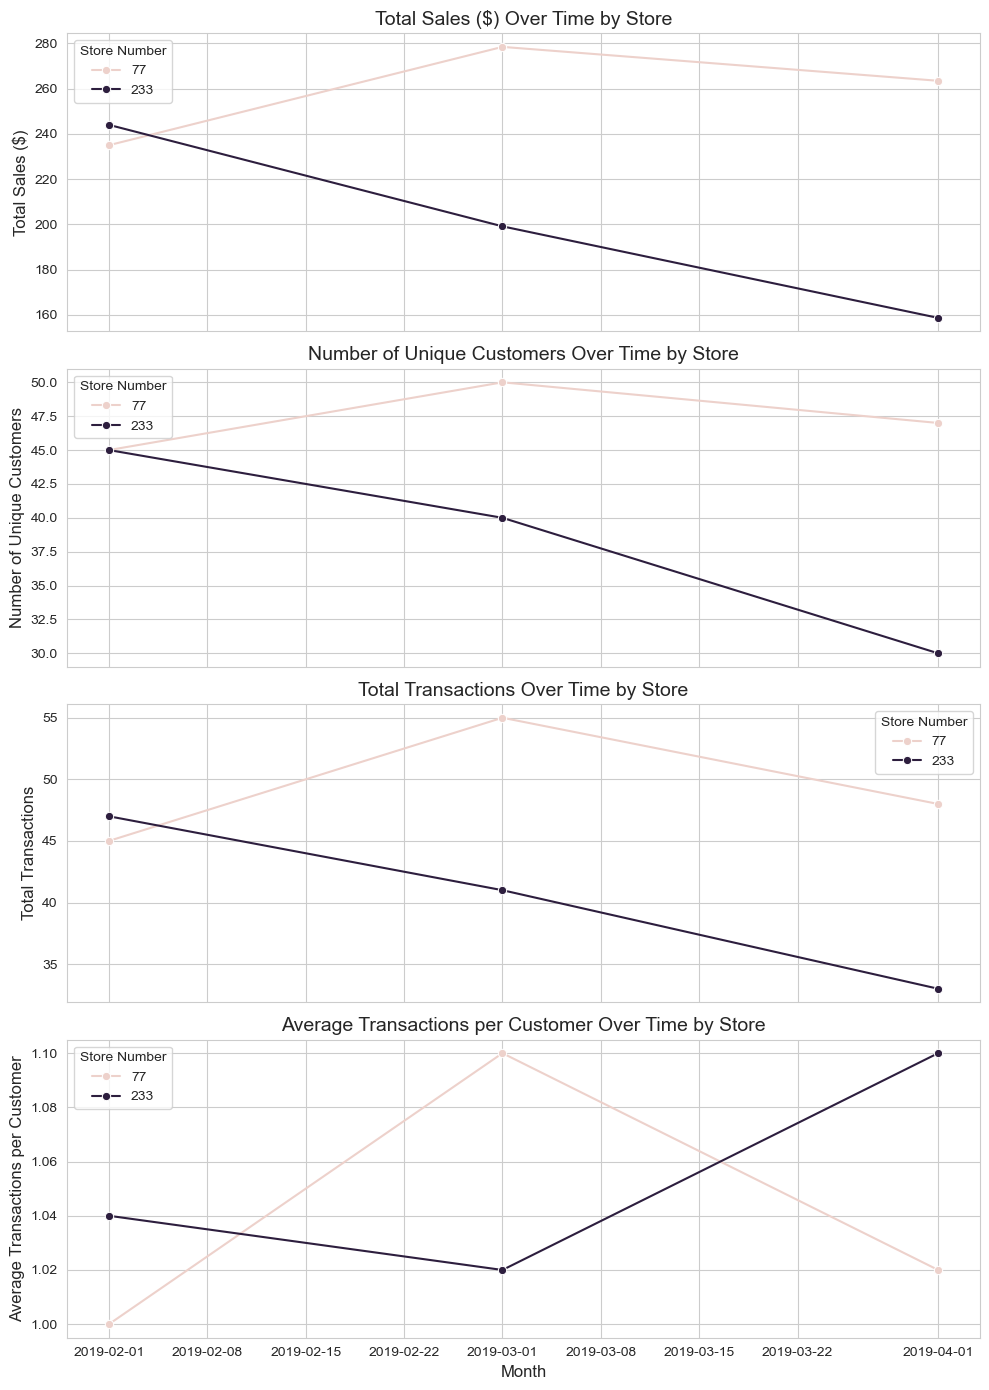

In [25]:
store_77_233['YEAR_MONTH'] = pd.to_datetime(store_77_233['YEAR_MONTH'])
sns.set_style("whitegrid")
metrics_info = {
    'TOT_SALES': 'Total Sales ($)',
    'UNIQUE_CUSTOMERS': 'Number of Unique Customers',
    'TOTAL_TXNS': 'Total Transactions',
    'AVG_TXNS_PER_CUST': 'Average Transactions per Customer'
}
fig, axes = plt.subplots(len(metrics_info), 1, figsize=(10, 14), sharex=True)
for i, (metric, ylabel) in enumerate(metrics_info.items()):
    sns.lineplot(
        data=store_77_233,
        x='YEAR_MONTH',
        y=metric,
        hue='STORE_NBR',
        marker='o',
        ax=axes[i]
    )
    axes[i].set_title(f'{ylabel} Over Time by Store', fontsize=14)
    axes[i].set_ylabel(ylabel, fontsize=12)
    axes[i].legend(title='Store Number')
axes[-1].set_xlabel('Month', fontsize=12)
plt.tight_layout()
plt.show()

Trial 77 and Control 233 Analysis
Total Sales:
- Trial store 77 experienced a 6.71% increase in total sales during the trial period, while control store 233 saw a significant decline. This suggests that the trial layout may have had a positive impact on revenue. However, the result should be interpreted with caution, as the drop in the control store’s sales could be due to external factors unrelated to the trial. To further enhance sales, a possible recommendation is to position high demand or seasonal items near the entrance to drive early conversion.

Unique Customers:
- Store 77 showed a 10.8% increase in unique customers, while store 233 experienced a 9.96% decline. This indicates that the trial layout may have been effective in attracting new customers or attracting returning customers. To build on this momentum, the store could implement a monthly rotation of featured products near high visibility areas to maintain novelty and broaden appeal across customer segments.

Average Transactions per Customer
- While average transactions per customer decreased at the trial store, total sales and unique customers increased. This suggests that although individual customers are making fewer trips, they may be spending more per visit, or new customers are compensating with higher value. This shift should be monitored further, and the store might consider bundling or upselling strategies to encourage more frequent transactions.



Trial Store 86, 138

In [26]:
store_86_stats = comp_df.loc[86].reset_index()
store_86_stats.insert(1, "STORE_NBR", [86, 86, 86])
store_138_stats = comp_df.loc[138].reset_index()
store_138_stats.insert(1, "STORE_NBR", [138, 138, 138])
store_86_138 = pd.concat([store_86_stats, store_138_stats])
store_86_138

,YEAR_MONTH,STORE_NBR,TOT_SALES,UNIQUE_CUSTOMERS,TOTAL_TXNS,AVG_TXNS_PER_CUST
0,2019-02,86,913.2,107,139,1.30
1,2019-03,86,1026.8,115,142,1.23
2,2019-04,86,848.2,105,127,1.21
0,2019-02,138,748.6,90,112,1.24
1,2019-03,138,940.6,106,138,1.30
2,2019-04,138,834.2,106,128,1.21


In [27]:
results_86 = calculate_pre_post_growth(86, 138, full_df, '2019-02')
results_86

,trial_growth_pct,control_growth_pct,difference_in_diff
TOT_SALES,6.31,-6.88,13.19
UNIQUE_CUSTOMERS,9.47,-1.86,11.33
TOTAL_TXNS,7.94,-3.61,11.54
AVG_TXNS_PER_CUST,-1.39,-1.80,0.40


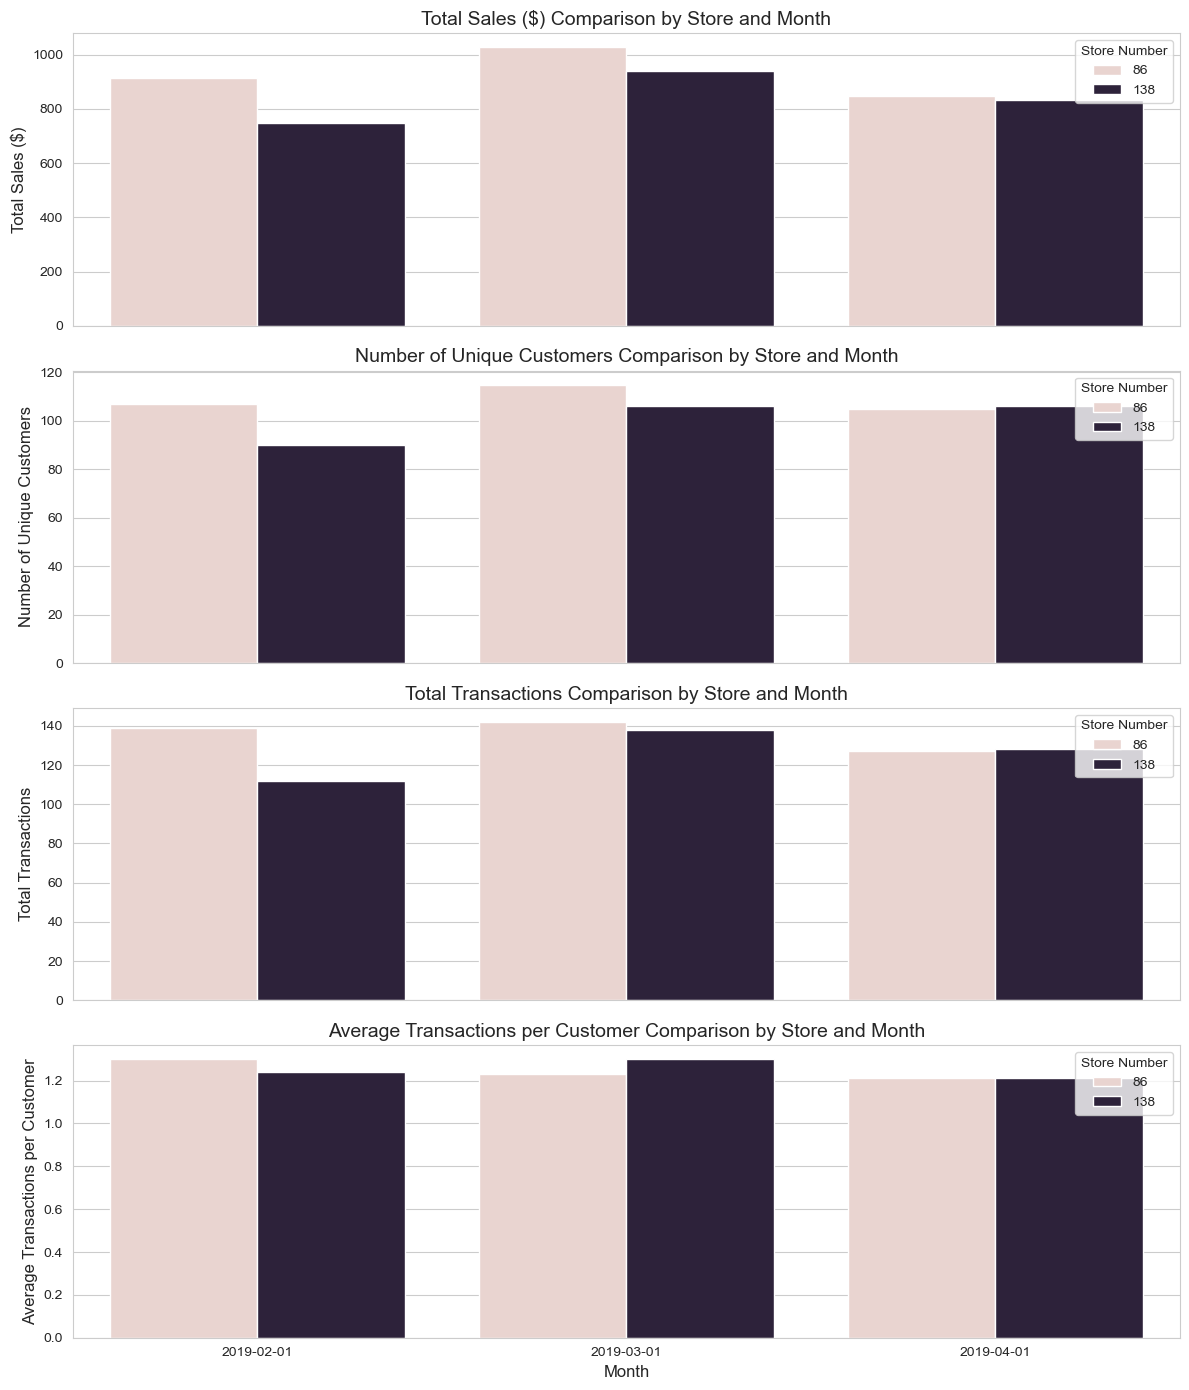

In [28]:
store_86_138['YEAR_MONTH'] = pd.to_datetime(store_86_138['YEAR_MONTH'])
metrics_info = {
    'TOT_SALES': 'Total Sales ($)',
    'UNIQUE_CUSTOMERS': 'Number of Unique Customers',
    'TOTAL_TXNS': 'Total Transactions',
    'AVG_TXNS_PER_CUST': 'Average Transactions per Customer'
}
fig, axes = plt.subplots(len(metrics_info), 1, figsize=(12, 14), sharex=True)
for i, (metric, ylabel) in enumerate(metrics_info.items()):
    sns.barplot(
        data=store_86_138,
        x='YEAR_MONTH',
        y=metric,
        hue='STORE_NBR',
        ax=axes[i]
    )
    axes[i].set_title(f'{ylabel} Comparison by Store and Month', fontsize=14)
    axes[i].set_ylabel(ylabel, fontsize=12)
    axes[i].legend(title='Store Number')
axes[-1].set_xlabel('Month', fontsize=12)
plt.tight_layout()
plt.show()


Trial 86 and Control 138 Analysis


Total Sales:
- Trial store 86 experienced a 6.31% increase in total sales during the trial period, while control store 138 experienced a 6.88 decrease. The growth rate is fairly similar to trial store 77, which further supports that the trial layout had a positive impact on revenue. Interestingly, control store 233 saw a similar decline in total sales, indicating that most trial stores may have experienced a decline in sales during the trial period.

Unique Customers:
- Store 86 saw a 9.47% increase in unique customers, while store 138 experienced a slight decrease in 1.86 percent. This further supports the positive effect of the trial layout in attracting more customers.

Average Transactions per Customer
- For both stores, average transactions per customers decreased slightly. Despite this, the two stores saw different returns in terms of total sales and total transactions. Trial store 86 saw an increase in transactions, whereas store 138 saw a small decrease. This indicates that for store 86, despite a decrease in average transactions per customer, the increase in unique customersa ultimately led to higher sales.



Trial Store 88, Control 178

In [29]:
store_88_stats = comp_df.loc[88].reset_index()
store_88_stats.insert(1, "STORE_NBR", [88, 88, 88])
store_201_stats = comp_df.loc[201].reset_index()
store_201_stats.insert(1, "STORE_NBR", [201, 201, 201])
store_88_201 = pd.concat([store_88_stats, store_201_stats])
store_88_201

,YEAR_MONTH,STORE_NBR,TOT_SALES,UNIQUE_CUSTOMERS,TOTAL_TXNS,AVG_TXNS_PER_CUST
0,2019-02,88,1370.2,124,154,1.24
1,2019-03,88,1477.2,134,170,1.27
2,2019-04,88,1439.4,128,162,1.27
0,2019-02,201,1139.2,111,128,1.15
1,2019-03,201,1364.2,130,152,1.17
2,2019-04,201,1246.6,122,146,1.20


In [30]:
results_88 =  calculate_pre_post_growth(88 , 201, full_df, '2019-02')
results_88

,trial_growth_pct,control_growth_pct,difference_in_diff
TOT_SALES,6.60,6.77,-0.17
UNIQUE_CUSTOMERS,2.35,4.44,-2.09
TOTAL_TXNS,4.81,5.30,-0.49
AVG_TXNS_PER_CUST,2.44,0.65,1.79


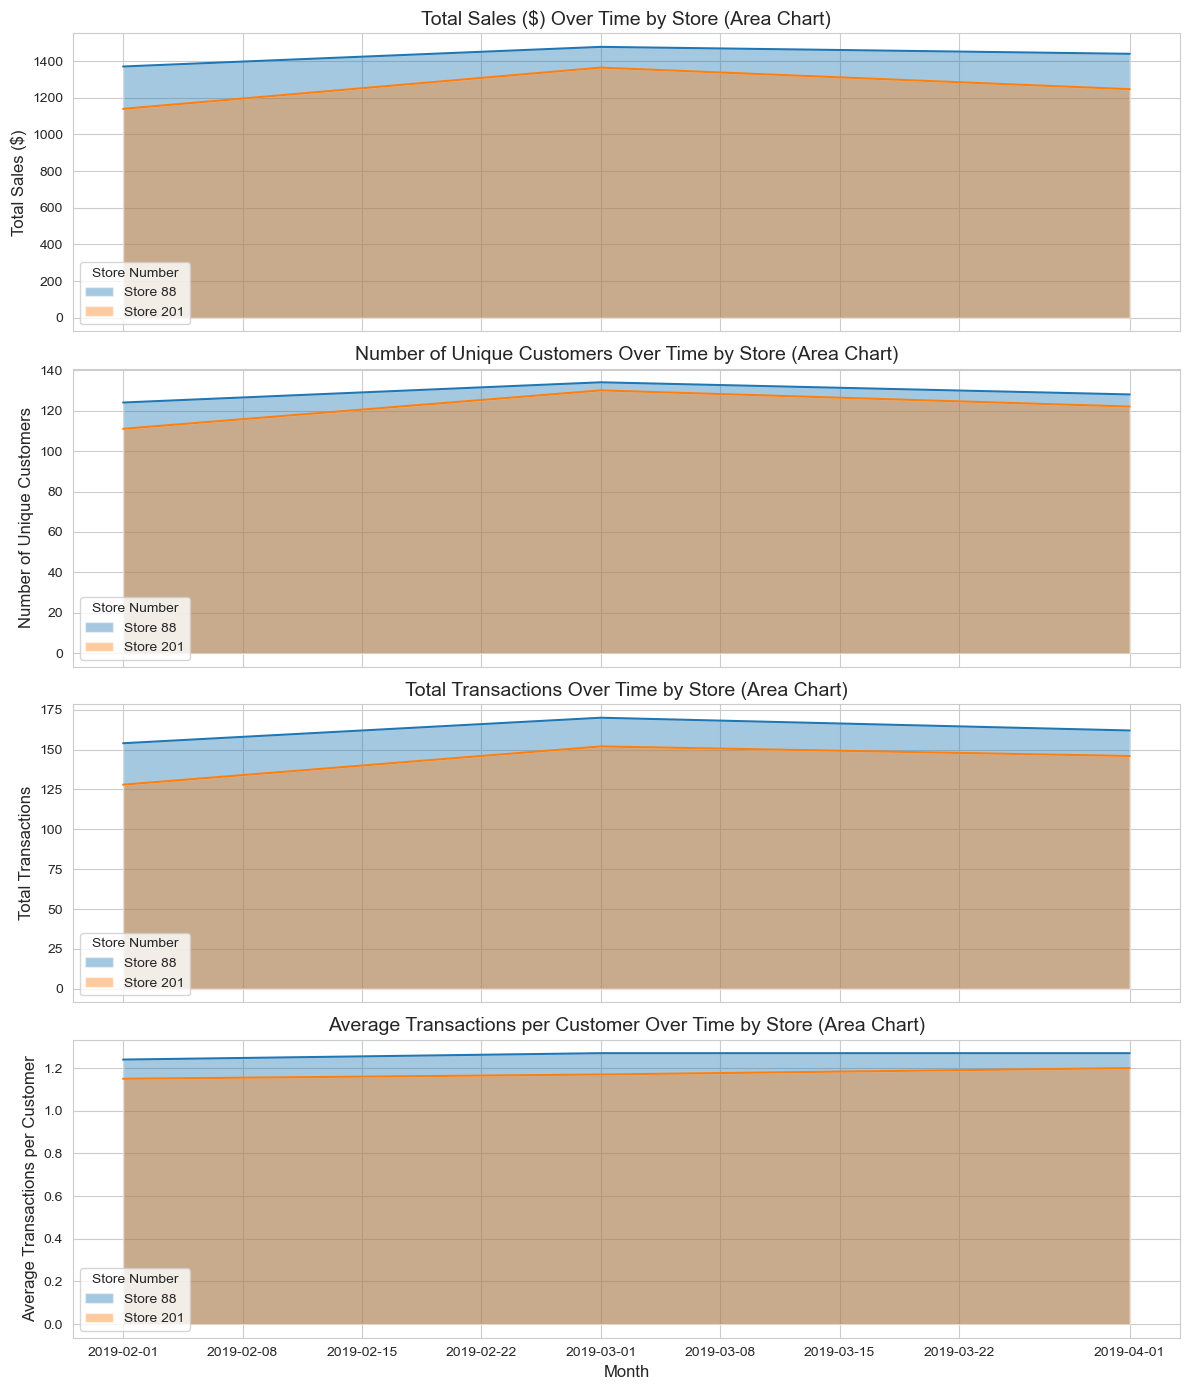

In [31]:
store_88_201['YEAR_MONTH'] = pd.to_datetime(store_88_201['YEAR_MONTH'])

metrics_info = {
    'TOT_SALES': 'Total Sales ($)',
    'UNIQUE_CUSTOMERS': 'Number of Unique Customers',
    'TOTAL_TXNS': 'Total Transactions',
    'AVG_TXNS_PER_CUST': 'Average Transactions per Customer'
}

fig, axes = plt.subplots(len(metrics_info), 1, figsize=(12, 14), sharex=True)
for i, (metric, ylabel) in enumerate(metrics_info.items()):
    for store in store_88_201['STORE_NBR'].unique():
        data = store_88_201[store_88_201['STORE_NBR'] == store]
        axes[i].fill_between(data['YEAR_MONTH'], 
                             data[metric], 
                             alpha=0.4, 
                             label=f'Store {store}')
        axes[i].plot(data['YEAR_MONTH'], data[metric])  # plot line on top for clarity
    axes[i].set_title(f'{ylabel} Over Time by Store (Area Chart)', fontsize=14)
    axes[i].set_ylabel(ylabel, fontsize=12)
    axes[i].legend(title='Store Number')
axes[-1].set_xlabel('Month', fontsize=12)
plt.tight_layout()
plt.show()


Trial Store 88 and Control Store 201 Analysis

Total Sales:
- Trial store 88 saw a 6.6% increase in total sales during the trial period, while control store 201 saw a similar 6.77% increase in total sales. This is the first instance during the experiment where both stores saw an increase in total sales. Despite the increase in total sales for store 201, trial store 88 remained fairly consistent in terms of growth comparing to other trial store, indicating that there is a positive impact with the trial layout and total sales.

Unique Customers:
- Store 88 saw a modest 2.35% increase in unique customers, compared to a 4.44% increase at the control store. This raises concerns about the trial layout’s effectiveness in attracting new or returning customers, as the control store outperformed in this area. One explanation may be that Store 201 has stronger baseline performance or more effective local marketing. The result suggests that layout changes alone may not be enough to drive customer growth without supporting promotions.

Average Transactions Per Customer:
- Here, Store 88 outperformed, with a 2.44% increase in average transactions per customer, compared to 0.65% at the control store a difference in difference of +1.79%. This suggests that while Store 88 didn’t attract significantly more customers, those who did shop there were more engaged, possibly purchasing more frequently or spending more per visit. This could be a result of improved product placement, easier navigation, or a more appealing in store experience.



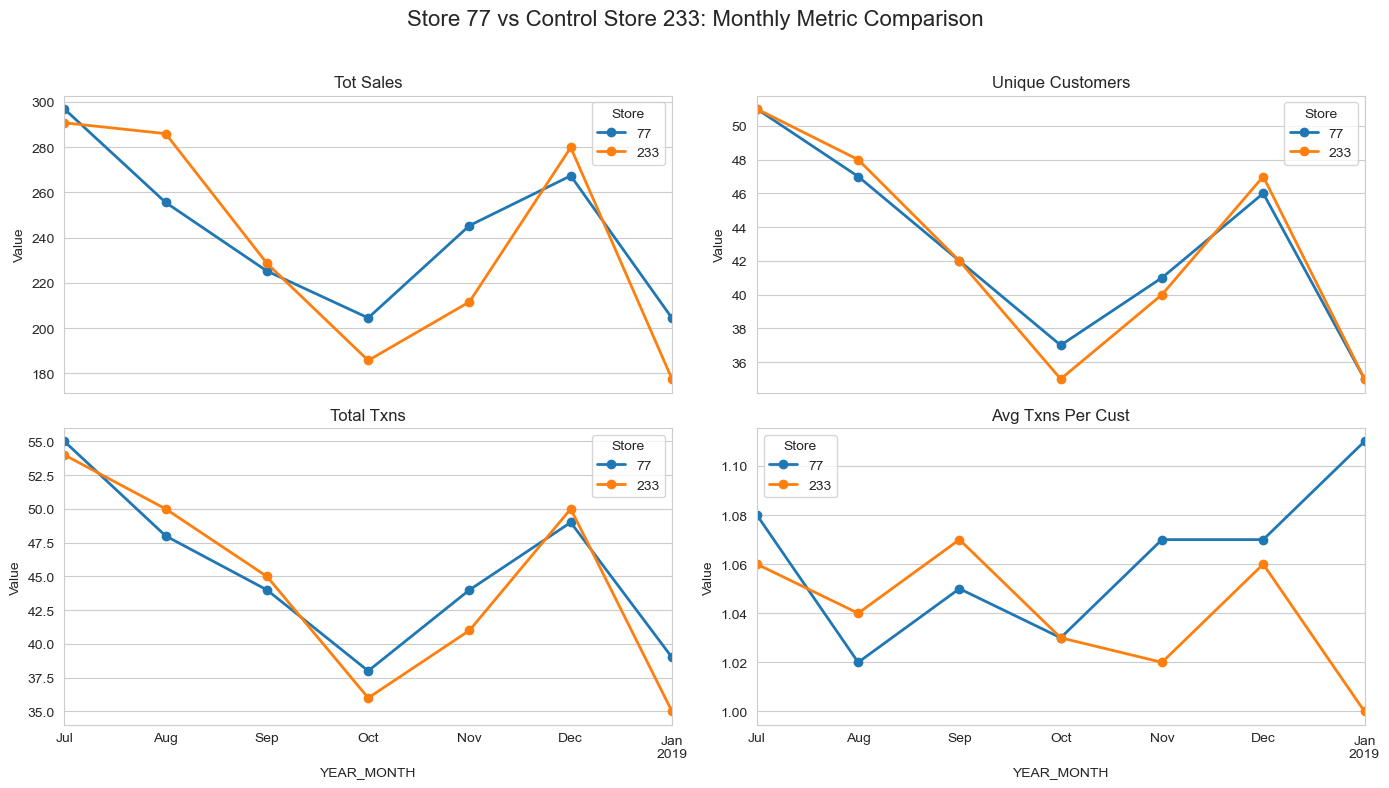

In [59]:
overview_77_233 = metrics_df.loc[[77, 233]].reset_index()
overview_77_233
overview_77_233['YEAR_MONTH'] = pd.to_datetime(overview_77_233['YEAR_MONTH'])
overview_77_233.set_index(['YEAR_MONTH', 'STORE_NBR'], inplace=True)
metrics = ['TOT_SALES', 'UNIQUE_CUSTOMERS', 'TOTAL_TXNS', 'AVG_TXNS_PER_CUST']
fig, axes = plt.subplots(2, 2, figsize=(14, 8), sharex=True)
axes = axes.flatten()
for i, metric in enumerate(metrics):
    # Pivot the data so each store becomes a column
    pivot = overview_77_233[metric].unstack()
    pivot.plot(ax=axes[i], marker='o', linewidth=2)
    axes[i].set_title(metric.replace("_", " ").title())
    axes[i].set_ylabel("Value")
    axes[i].legend(title="Store")
    axes[i].grid(True)
plt.suptitle("Store 77 vs Control Store 233: Monthly Metric Comparison", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


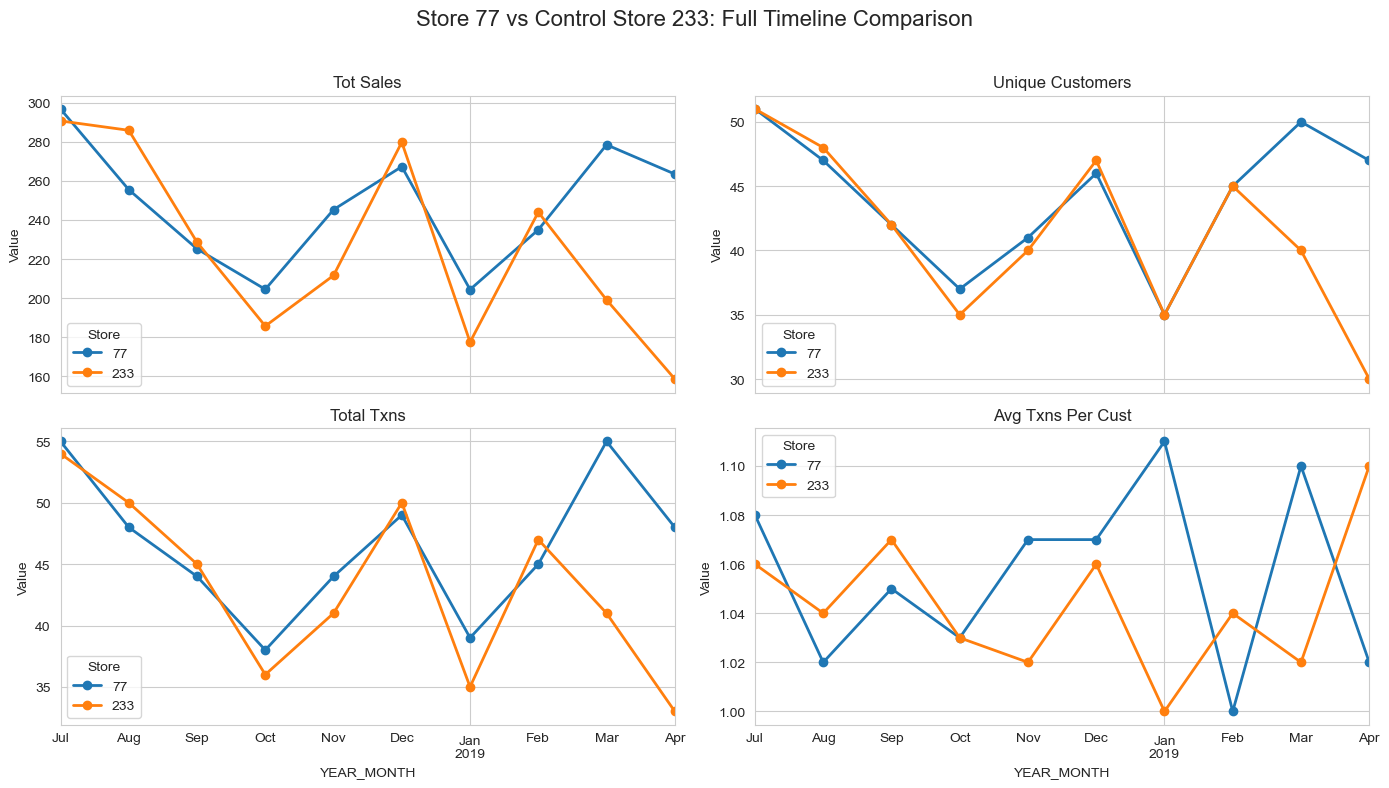

In [91]:
overview_77_233 = overview_77_233.reset_index(drop=True)
combined_df = pd.concat([overview_77_233, store_77_233], ignore_index=True)
combined_df = combined_df.sort_values(["STORE_NBR", "YEAR_MONTH"])
combined_df['YEAR_MONTH'] = pd.to_datetime(combined_df['YEAR_MONTH'])
combined_df.set_index(['YEAR_MONTH', 'STORE_NBR'], inplace=True)
metrics = ['TOT_SALES', 'UNIQUE_CUSTOMERS', 'TOTAL_TXNS', 'AVG_TXNS_PER_CUST']
fig, axes = plt.subplots(2, 2, figsize=(14, 8), sharex=True)
axes = axes.flatten()
for i, metric in enumerate(metrics):
    pivot = combined_df[metric].unstack()
    pivot.plot(ax=axes[i], marker='o', linewidth=2)
    axes[i].set_title(metric.replace("_", " ").title())
    axes[i].set_ylabel("Value")
    axes[i].legend(title="Store")
    axes[i].grid(True)
plt.suptitle("Store 77 vs Control Store 233: Full Timeline Comparison", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Conclusion:

- The trial layout seems effective in increasing total sales, as all three stores experienced a boost in around 6.5%. However, as control store 201 experienced a similar increase in total sales during that period at around 6.77%, the solution may not be as simple as changing the layout. Better marketing and bundle deals should also be considered alongside the new layout to maximize sales.
- The driver of change seems to be more unique customers purchasing from the store. All 3 trial stores saw an increase in unique customers, with trial store 77 and 86 seeing a massive growth. The new layout seems to be attracting more customers to enter and view items they may not have noticed prior. A potential suggestion could be implmenting a monthly "hot" items display, attracting new customers and retaining returning customers' interest.